In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **How do we load and preview the Uber dataset?**

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UberDataset.csv")

In [7]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
dataset.shape

(1156, 7)

# **What is the structure and data types of the Uber dataset?**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# **Data Preprocessing**

In [ ]:
dataset['PURPOSE'].fillna("NOT", inplace = True)

<ipython-input-7-54397fe5486e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace = True)


In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   date        421 non-null    object        
 8   time        421 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 81.4+ KB


In [ ]:
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
dataset['day-night'] = pd.cut(x=dataset['time'],bins = [0,10,15,19,24],labels = ['Night','Morning','Afternoon','Evening'])

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Morning


In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.shape

(413, 10)

# **Data Visualization**
# **In which category do people book the most Uber rides?**
# **For which purpose do people book Uber rides the most?**

<Axes: xlabel='count', ylabel='PURPOSE'>

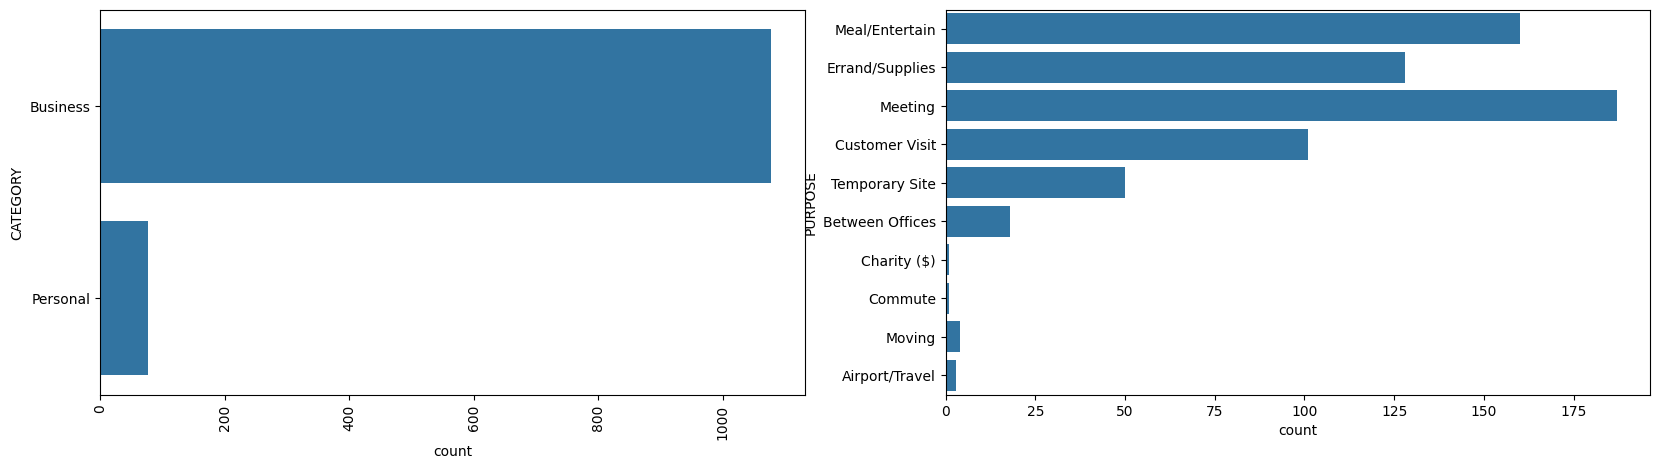

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation =90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])

# **At what time do people book cabs the most from Uber?**

<Axes: xlabel='count', ylabel='day-night'>

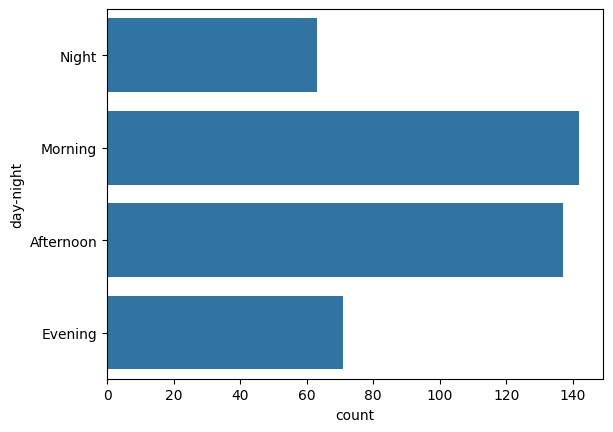

In [ ]:
sns.countplot(dataset['day-night'])

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Morning


In [ ]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month #It extracts the month from START_DATE

month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'} #It assigns string names to the MONTHS

dataset["MONTH"] = dataset.MONTH.map(month_label) #It replaces number months with string names

mon = dataset.MONTH.value_counts(sort=False) #It calculates the counts for each month

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Night,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Morning,Jan


# **In which months do people book Uber rides less frequently?**

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

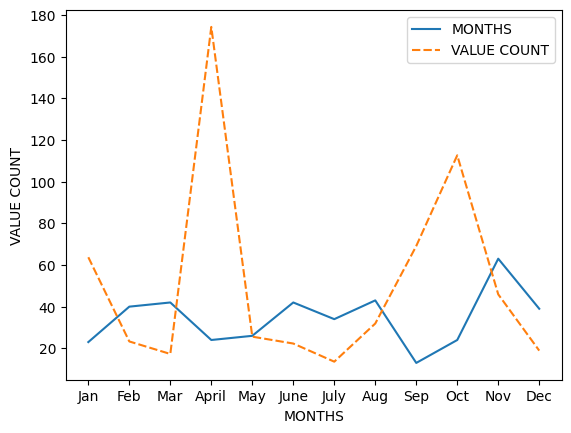

In [ ]:
df = pd.DataFrame({
 "MONTHS": mon.values,
 "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max() #The value of max miles for each month
 })

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT") #It sets the axis label

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Night,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Morning,Jan


In [ ]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
 0: 'Mon', 1:'Tues', 2:'Wed', 3:'Thur',4:'Fri', 5:'Sat', 6:'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Night,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Morning,Jan,Wed


# **On which days of the week do people book Uber rides the most?**

Text(0, 0.5, 'COUNT')

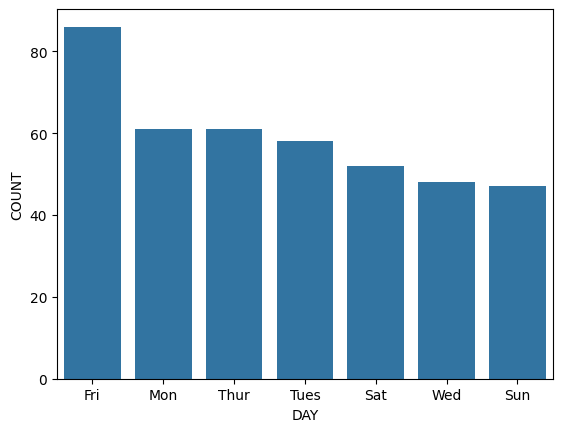

In [ ]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
 0: 'Mon', 1:'Tues', 2:'Wed', 3:'Thur',4:'Fri', 5:'Sat', 6:'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)
day_label = dataset.DAY.value_counts()

sns.barplot(x=day_label.index, y= day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Night,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Morning,Jan,Wed


<Axes: ylabel='MILES'>

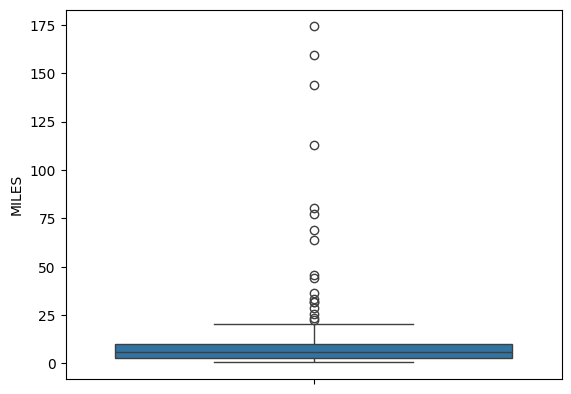

In [ ]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

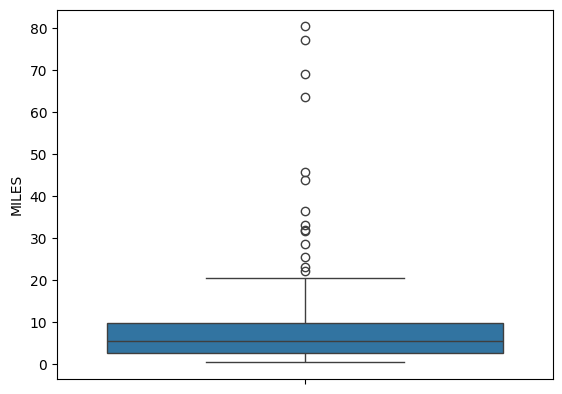

In [ ]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

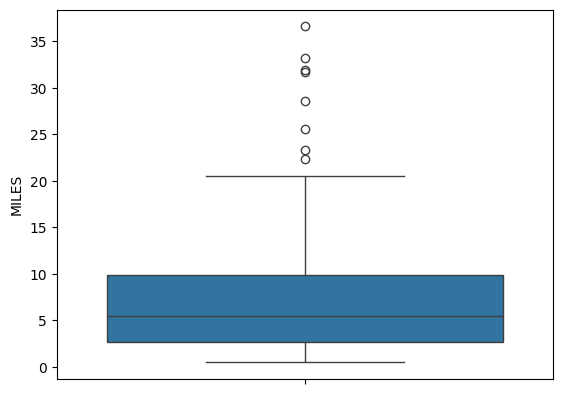

In [ ]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

# **How many miles do people usually book a cab for through Uber?**

<ipython-input-32-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

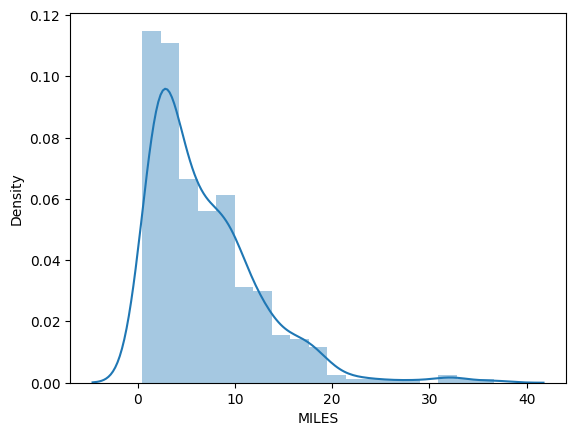

In [ ]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

# **What is the average ride distance (in miles) for each ride purpose?**

In [ ]:
dataset.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)

,MILES
PURPOSE,
Customer Visit,18.639130
Meeting,13.973077
Between Offices,10.933333
Temporary Site,7.757143
NOT,7.063522
Meal/Entertain,4.840323
Errand/Supplies,4.208889


# **Which location has the highest number of pickups (START)?**

In [ ]:
dataset['START'].value_counts().head(10)

,count
START,
Cary,94
Morrisville,37
Whitebridge,34
Unknown Location,22
Durham,17
Raleigh,11
Apex,8
Westpark Place,8
Berkeley,7


# **Which location has the highest number of drop-offs (STOP)?**

In [ ]:
dataset['STOP'].value_counts().head(10)

,count
STOP,
Cary,91
Morrisville,40
Whitebridge,28
Unknown Location,21
Durham,19
Raleigh,11
Berkeley,8
Apex,8
Westpark Place,7


# **Total number of rides taken for Business vs. Personal?**

In [ ]:
dataset['CATEGORY'].value_counts()

,count
CATEGORY,
Business,400
Personal,13


# **Which month had the highest total distance traveled?**

In [ ]:
# Convert to datetime and extract month names
dataset['Month'] = pd.to_datetime(dataset['START_DATE']).dt.strftime('%B')

# Group by month names and sum miles
monthly_distance = dataset.groupby('Month')['MILES'].sum()

# Sort by miles in descending order
monthly_distance = monthly_distance.sort_values(ascending=False)

# Print results
print(monthly_distance.to_string(float_format='%.2f miles'))

Month
April       813.80 miles
November    400.60 miles
October     361.50 miles
February    309.00 miles
July        292.80 miles
June        275.50 miles
August      261.40 miles
March       259.30 miles
May         239.00 miles
December    198.20 miles
January     183.60 miles
September   172.20 miles


# **How does ride frequency vary across weekdays vs. weekends?**

In [ ]:
# Convert to datetime and extract weekday name
dataset['Day'] = pd.to_datetime(dataset['START_DATE']).dt.day_name()

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
dataset['DayType'] = dataset['Day'].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

# Count rides by day type
ride_counts = dataset['DayType'].value_counts()

# Print the result
print(ride_counts)

DayType
Weekday    314
Weekend     99
Name: count, dtype: int64


# **Which purpose has the highest total distance covered?**

In [ ]:
dataset.groupby('PURPOSE')['MILES'].sum().sort_values(ascending=False)

,MILES
PURPOSE,
NOT,1123.1
Meeting,1089.9
Customer Visit,857.4
Meal/Entertain,300.1
Errand/Supplies,189.4
Temporary Site,108.6
Between Offices,98.4


# **Which routes have the longest distances?**

In [ ]:
longest_routes = dataset.groupby(['START', 'STOP'])['MILES'].mean().sort_values(ascending=False).head(10)
print("Routes with the longest distances:\n", longest_routes.to_markdown(numalign="left", stralign="left"), "\n")

Routes with the longest distances:
 |                                    | MILES   |
|:-----------------------------------|:--------|
| ('Jacksonville', 'Ridgeland')      | 174.2   |
| ('Florence', 'Cary')               | 159.3   |
| ('Ridgeland', 'Florence')          | 144     |
| ('Daytona Beach', 'Jacksonville')  | 80.5    |
| ('Kissimmee', 'Daytona Beach')     | 77.3    |
| ('R?walpindi', 'Unknown Location') | 65.5    |
| ('Fort Pierce', 'West Palm Beach') | 63.7    |
| ('Berkeley', 'Menlo Park')         | 45.9    |
| ('Santa Clara', 'Berkeley')        | 43.9    |
| ('Menlo Park', 'Berkeley')         | 36.6    | 



# **Which trip purposes are associated with the longest distances?**

In [ ]:
longest_purpose = dataset.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False).head(10) # Changed df to dataset as it contains the 'PURPOSE' column
print("Trip purposes associated with the longest distances:\n", longest_purpose.to_markdown(numalign="left", stralign="left"), "\n")

Trip purposes associated with the longest distances:
 | PURPOSE         | MILES   |
|:----------------|:--------|
| Customer Visit  | 18.6391 |
| Meeting         | 13.9731 |
| Between Offices | 10.9333 |
| Temporary Site  | 7.75714 |
| NOT             | 7.06352 |
| Meal/Entertain  | 4.84032 |
| Errand/Supplies | 4.20889 | 



# **How do trip categories and purposes relate to each other?**

In [8]:
category_purpose_relation = pd.crosstab(dataset['CATEGORY'], dataset['PURPOSE']) # Changed df to dataset
print("Relationship between trip categories and purposes:\n", category_purpose_relation.to_markdown(numalign="left", stralign="left"), "\n")

Relationship between trip categories and purposes:
 | CATEGORY   | Airport/Travel   | Between Offices   | Charity ($)   | Commute   | Customer Visit   | Errand/Supplies   | Meal/Entertain   | Meeting   | Moving   | Temporary Site   |
|:-----------|:-----------------|:------------------|:--------------|:----------|:-----------------|:------------------|:-----------------|:----------|:---------|:-----------------|
| Business   | 3                | 18                | 0             | 0         | 101              | 128               | 160              | 187       | 0        | 50               |
| Personal   | 0                | 0                 | 1             | 1         | 0                | 0                 | 0                | 0         | 4        | 0                | 

